In [1]:
# Please visit:
#
# https://download.nkg-mn.com/credo/anomalies/
#
# Pretrained dots_v2.h5 and others can be downloaded from mentioned website.

In [2]:
from commons import *
from dataset_loader import load_from_file
from IPython.display import display
import matplotlib.pyplot as plt
import cv2

DOTS_DST = 'cache/dots_v2.pickle'
TRACKS_DST = 'cache/tracks_v2.pickle'
WORMS_DST = 'cache/worms_v2.pickle'
ARTIFACTS_DST = 'cache/artifacts_v2.pickle'

DOTS_AC = 'cache/dots_v2.h5'
TRACKS_AC = 'cache/tracks_v2.h5'
WORMS_AC = 'cache/worms_v2.h5'
ARTIFACTS_AC = 'cache/artifacts_v2.h5'


def train_and_test(train_set, validation_set, fn):
    autoencoder = original_autoencoder()
    autoencoder = train_or_cache(train_set, autoencoder, fn, validation_set=validation_set, force_train=True)

    for df_func, df_name in zip(
            [dm_func_mean],
            ['mean']
    ):
        for img_set, set_names in zip([validation_set], ['train']):
            decoded = autoencoder.predict(img_set)

            vis, errors = visualize_predictions(decoded, img_set, df_func, False, 16)
            img_path = fn.replace('.h5', '-vis.png')
            hist_path = fn.replace('.h5', '-hist.png')
            cv2.imwrite(img_path, vis)
            display(Image.open(img_path))
            if len(img_set) > 256:
                vis, errors = visualize_predictions(decoded, img_set, df_func, False)
                img_path = fn.replace('.h5', '-vis_full.png')
                cv2.imwrite(img_path, vis)

            plt.figure(figsize=(8,6))
            plt.hist(errors, bins=100, alpha=0.5, label=set_names)
            plt.xlabel("Data", size=14)
            plt.ylabel("Count", size=14)
            plt.title(df_name)
            plt.legend(loc='upper right')
            plt.savefig(hist_path)


def load_and_train(src, out):
    images, augmented = load_from_file(src)
    train_and_test(np.expand_dims(augmented, axis=-1), np.expand_dims(images, axis=-1), out)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/200
1290/1290 [==============================] - 19s 12ms/step - loss: 0.0289 - accuracy: 0.9706 - val_loss: 0.0247 - val_accuracy: 0.9739
Epoch 2/200
1290/1290 [==============================] - 15s 12ms/step - loss: 0.0241 - accuracy: 0.9740 - val_loss: 0.0237 - val_accuracy: 0.9747
Epoch 3/200
1290/1290 [==============================] - 16s 13ms/step - loss: 0.0147 - accuracy: 0.9833 - val_loss: 4.4235e-04 - val_accuracy: 0.9982
Epoch 4/200
1290/1290 [==============================] - 17s 13ms/step - loss: 1.0924e-05 - accuracy: 0.9979 - val_loss: 2.5466e-05 - val_accuracy: 0.9983
Epoch 5/200
1290/1290 [==============================] - 16s 12ms/step - loss: 8.3787e-06 - accuracy: 0.9979 - val_loss: 9.5684e-06 - val_accuracy: 0.9983
Epoch 6/200
1290/1290 [==============================] - 16s 13ms/step - loss: 8.3685e-06 - accuracy: 0.9979 - val_loss: 9.8460e-06 - val_accuracy: 0.9983
Epoch 7/200
1290/1290 

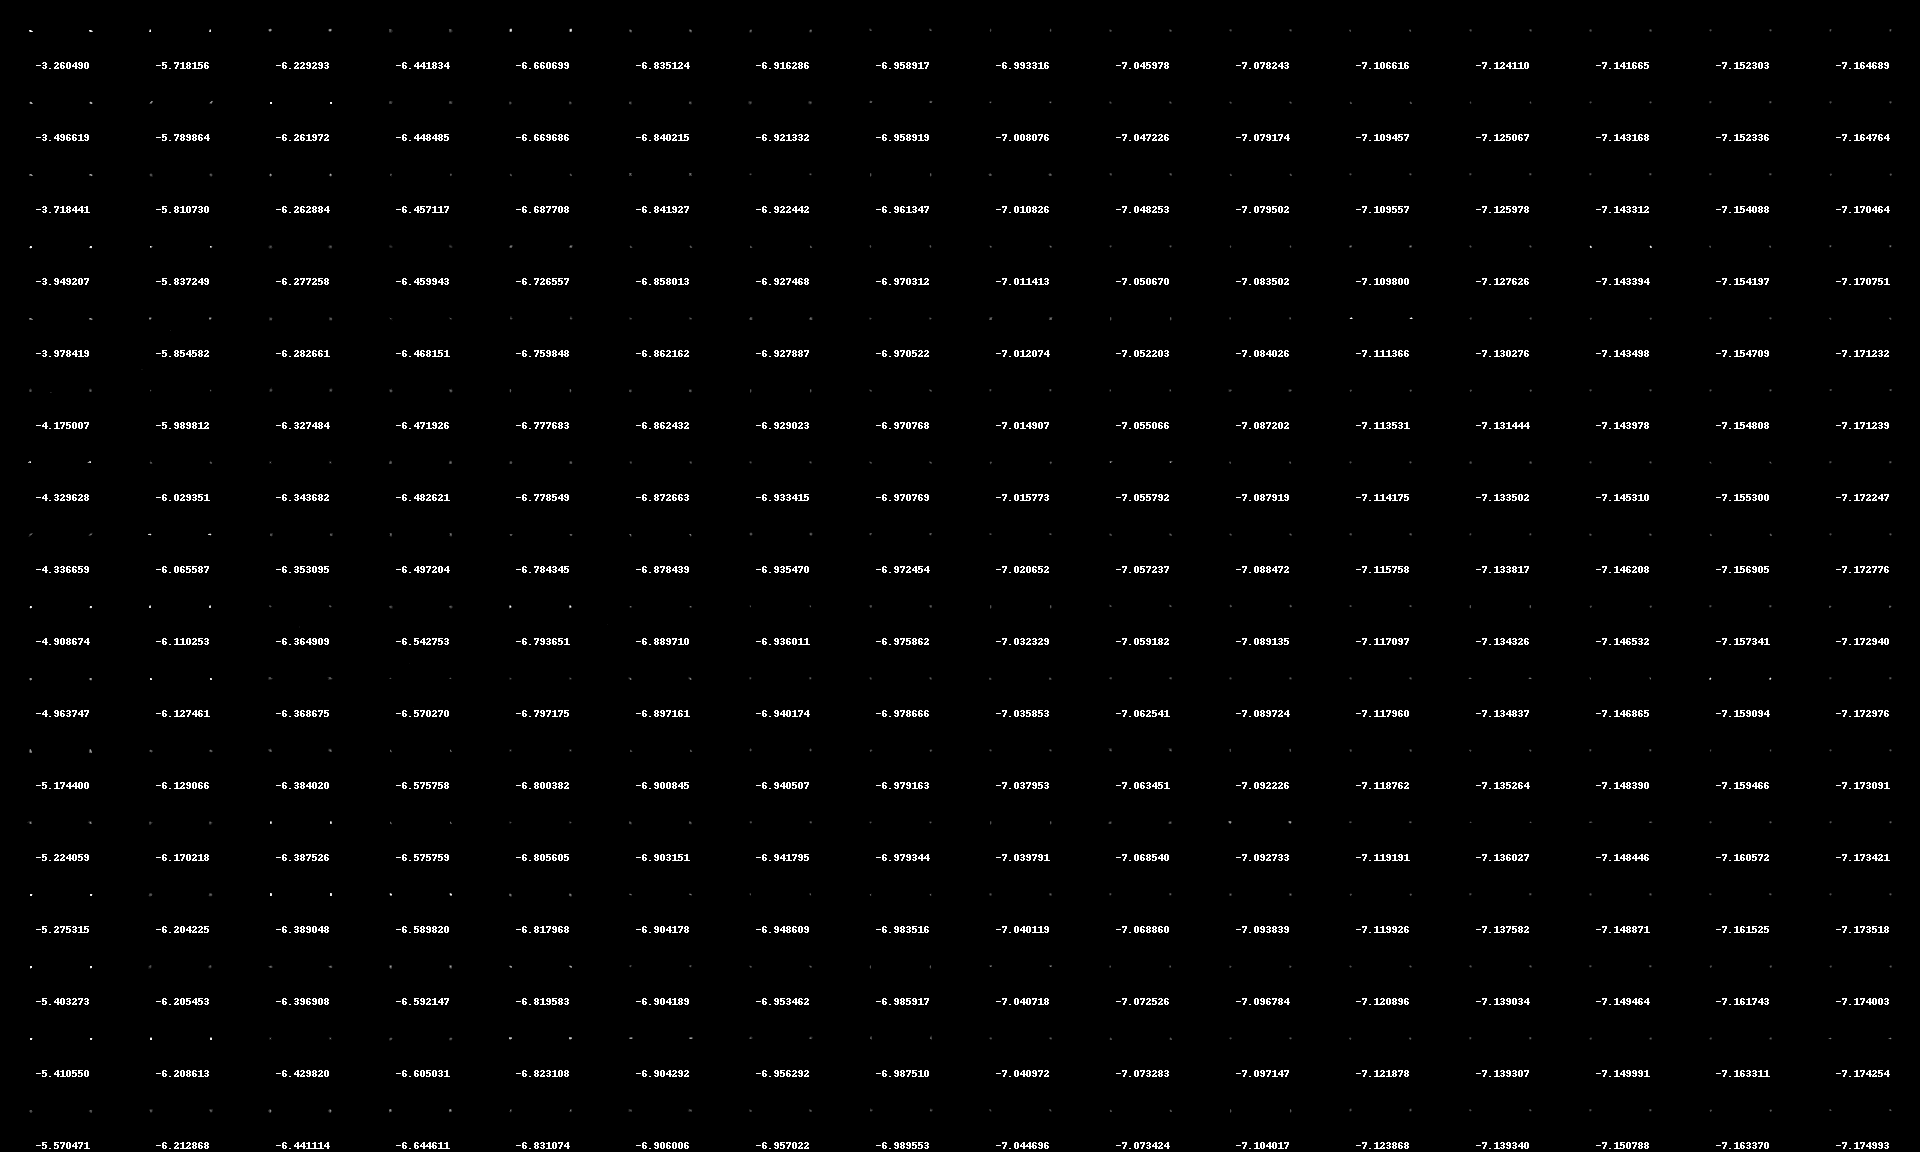

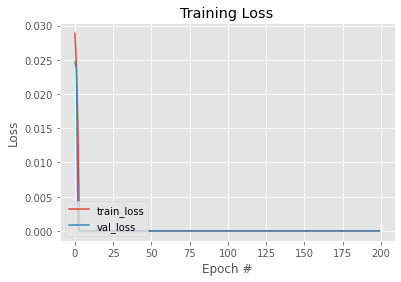

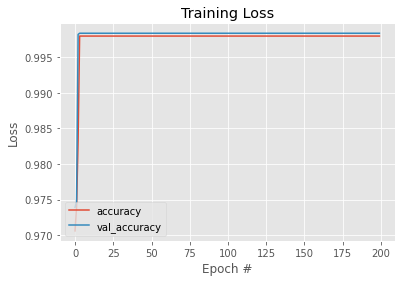

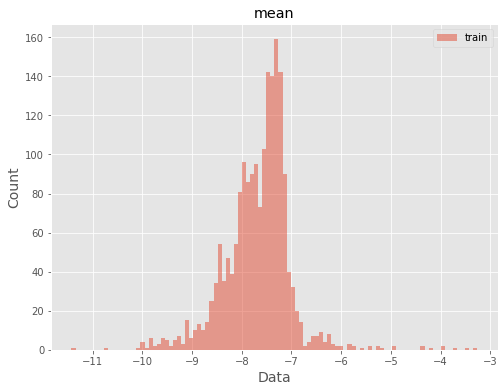

In [3]:
load_and_train(DOTS_DST, DOTS_AC)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/200
2108/2108 [==============================] - 26s 12ms/step - loss: 0.0145 - accuracy: 0.9816 - val_loss: 1.7810e-04 - val_accuracy: 0.9959
Epoch 2/200
2108/2108 [==============================] - 25s 12ms/step - loss: 8.2901e-05 - accuracy: 0.9949 - val_loss: 1.0408e-04 - val_accuracy: 0.9959
Epoch 3/200
2108/2108 [==============================] - 27s 13ms/step - loss: 6.7040e-05 - accuracy: 0.9949 - val_loss: 7.5728e-05 - val_accuracy: 0.9959
Epoch 4/200
2108/2108 [==============================] - 25s 12ms/step - loss: 5.6386e-05 - accuracy: 0.9949 - val_loss: 7.2371e-05 - val_accuracy: 0.9959
Epoch 5/200
2108/2108 [==============================] - 25s 12ms/step - loss: 5.2099e-05 - accuracy: 0.9949 - val_loss: 7.2499e-05 - val_accuracy: 0.9959
Epoch 6/200
2108/2108 [==============================] - 26s 12ms/step - loss: 5.0010e-05 - accuracy: 0.9949 - val_loss: 5.9284e-05 - val_accuracy: 0.9959
Epoch 

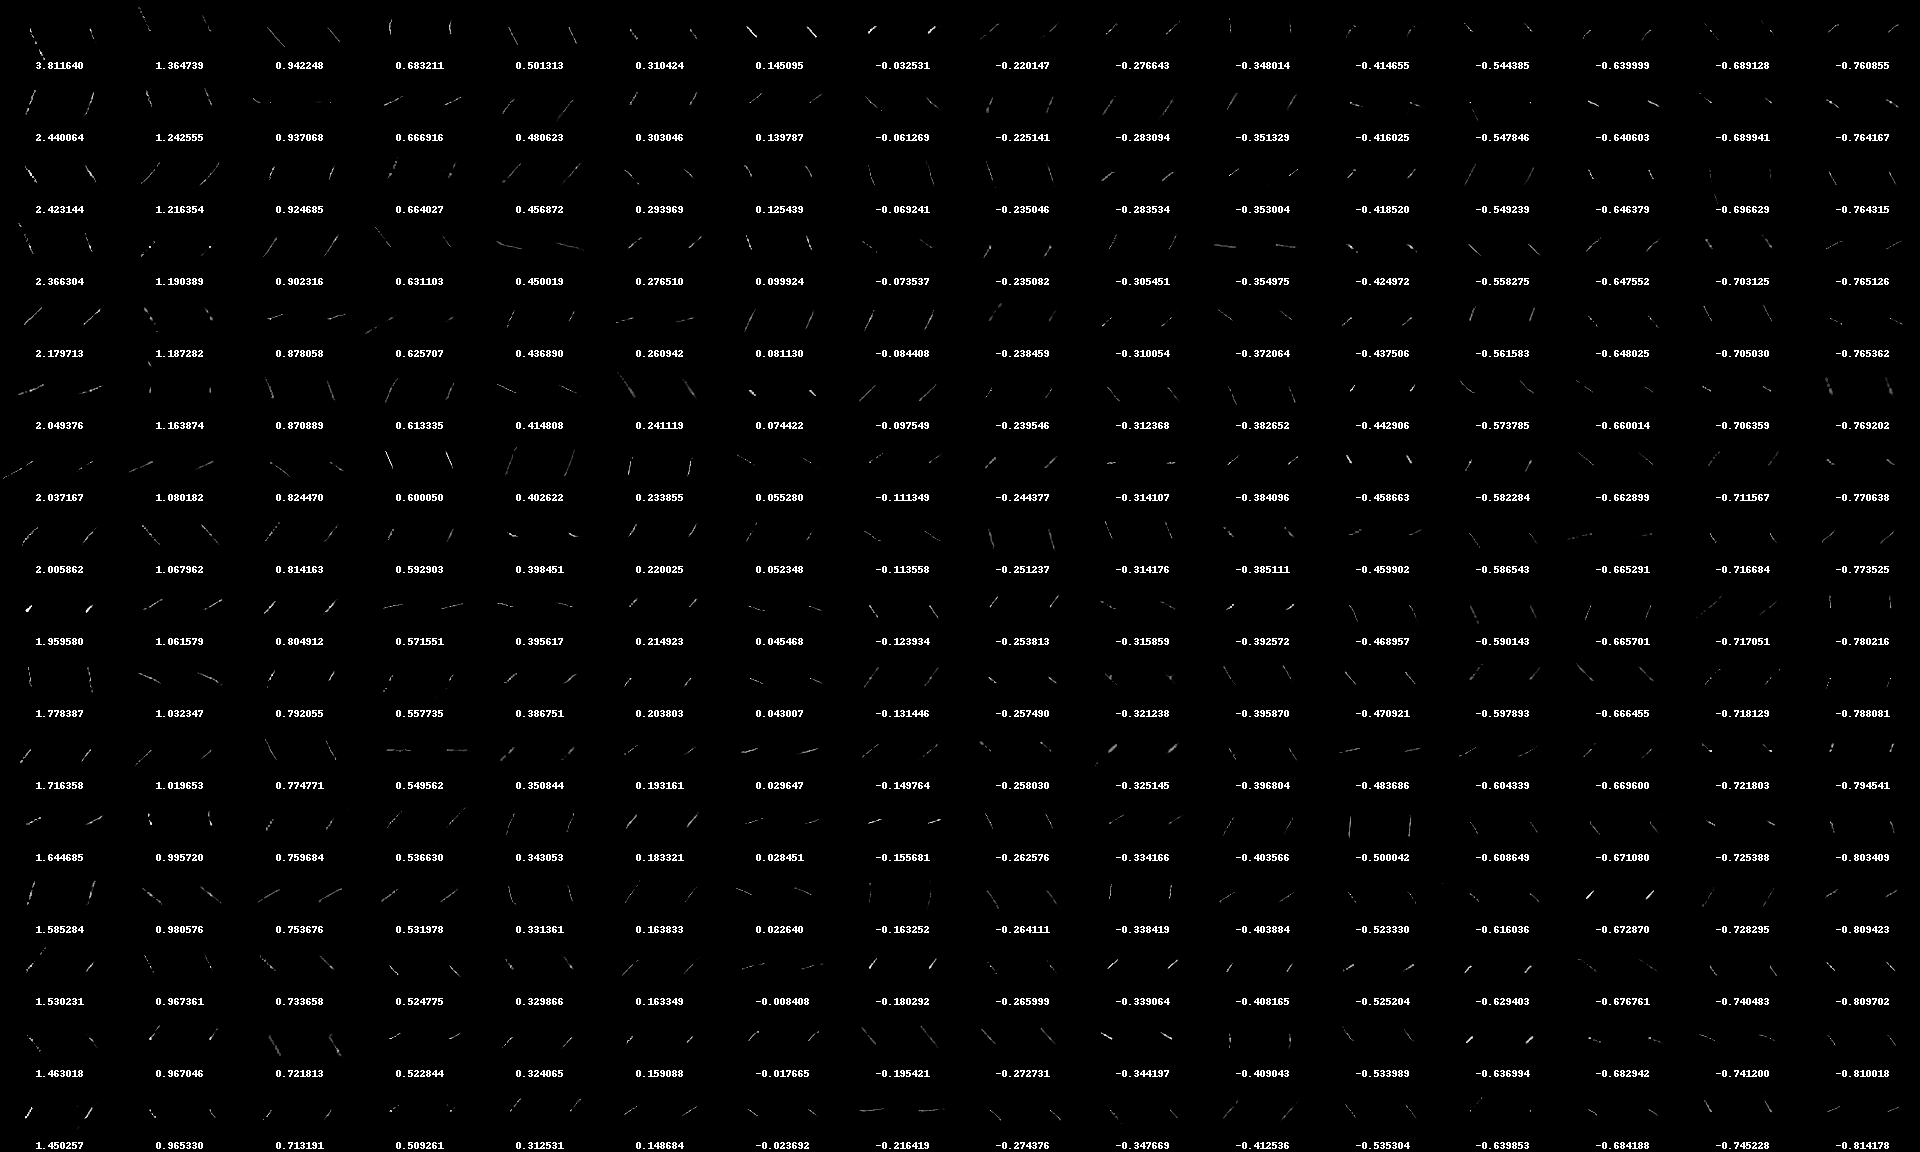

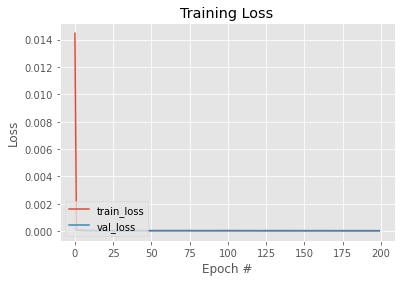

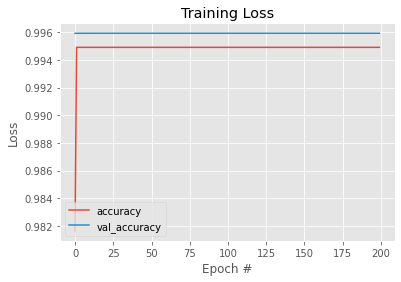

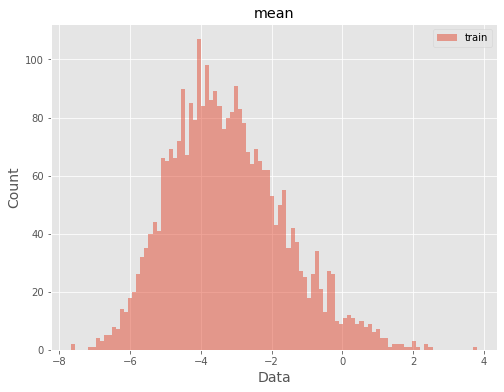

In [4]:
load_and_train(TRACKS_DST, TRACKS_AC)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/200
341/341 [==============================] - 4s 12ms/step - loss: 0.0500 - accuracy: 0.9466 - val_loss: 0.0389 - val_accuracy: 0.9562
Epoch 2/200
341/341 [==============================] - 4s 11ms/step - loss: 0.0381 - accuracy: 0.9553 - val_loss: 0.0385 - val_accuracy: 0.9562
Epoch 3/200
341/341 [==============================] - 4s 12ms/step - loss: 0.0354 - accuracy: 0.9575 - val_loss: 0.0349 - val_accuracy: 0.9594
Epoch 4/200
341/341 [==============================] - 4s 11ms/step - loss: 0.0342 - accuracy: 0.9585 - val_loss: 0.0340 - val_accuracy: 0.9602
Epoch 5/200
341/341 [==============================] - 4s 11ms/step - loss: 0.0336 - accuracy: 0.9588 - val_loss: 0.0327 - val_accuracy: 0.9608
Epoch 6/200
341/341 [==============================] - 4s 11ms/step - loss: 0.0332 - accuracy: 0.9591 - val_loss: 0.0330 - val_accuracy: 0.9607
Epoch 7/200
341/341 [==============================] - 4s 11ms/step 

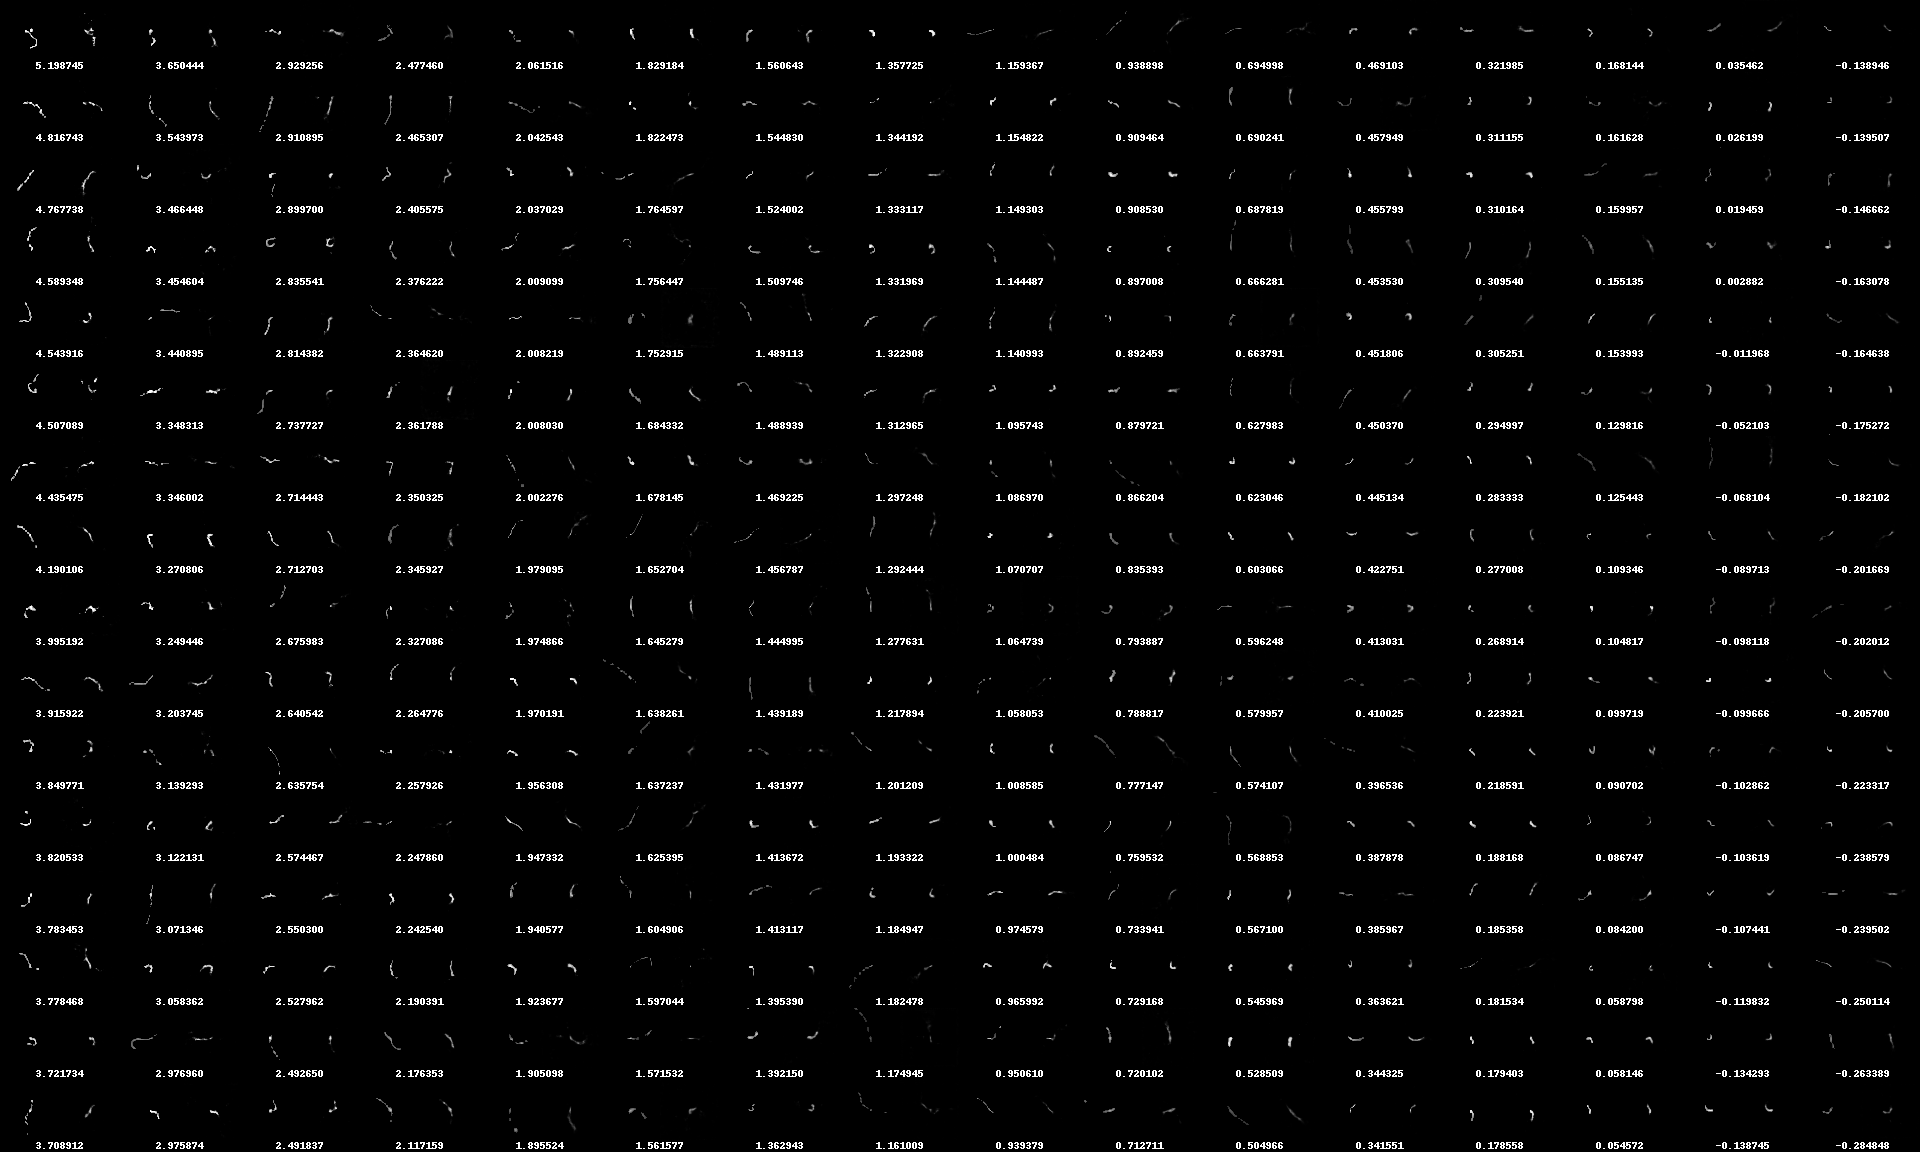

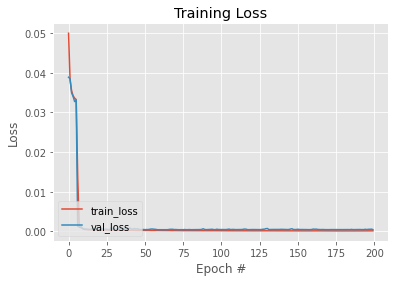

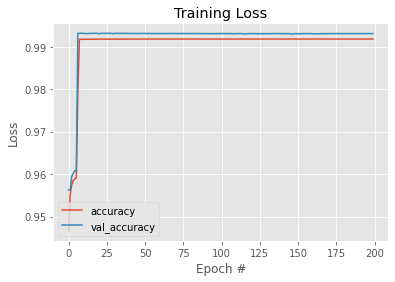

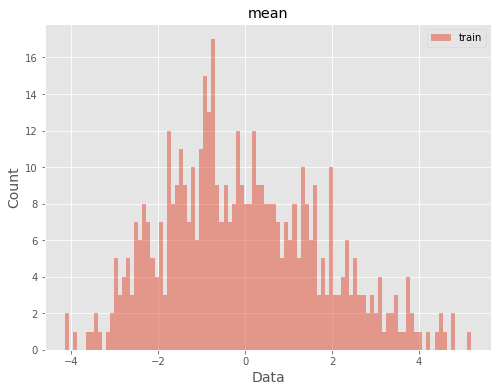

In [5]:
load_and_train(WORMS_DST, WORMS_AC)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/200
445/445 [==============================] - 6s 12ms/step - loss: 0.0202 - accuracy: 0.9780 - val_loss: 0.0010 - val_accuracy: 0.9947
Epoch 2/200
445/445 [==============================] - 5s 11ms/step - loss: 6.4006e-04 - accuracy: 0.9937 - val_loss: 7.0455e-04 - val_accuracy: 0.9947
Epoch 3/200
445/445 [==============================] - 5s 11ms/step - loss: 4.5995e-04 - accuracy: 0.9937 - val_loss: 6.4679e-04 - val_accuracy: 0.9947
Epoch 4/200
445/445 [==============================] - 5s 11ms/step - loss: 3.7610e-04 - accuracy: 0.9937 - val_loss: 4.1478e-04 - val_accuracy: 0.9947
Epoch 5/200
445/445 [==============================] - 5s 11ms/step - loss: 4.3702e-04 - accuracy: 0.9937 - val_loss: 4.4517e-04 - val_accuracy: 0.9947
Epoch 6/200
445/445 [==============================] - 5s 11ms/step - loss: 3.1862e-04 - accuracy: 0.9937 - val_loss: 5.6846e-04 - val_accuracy: 0.9947
Epoch 7/200
445/445 [=======

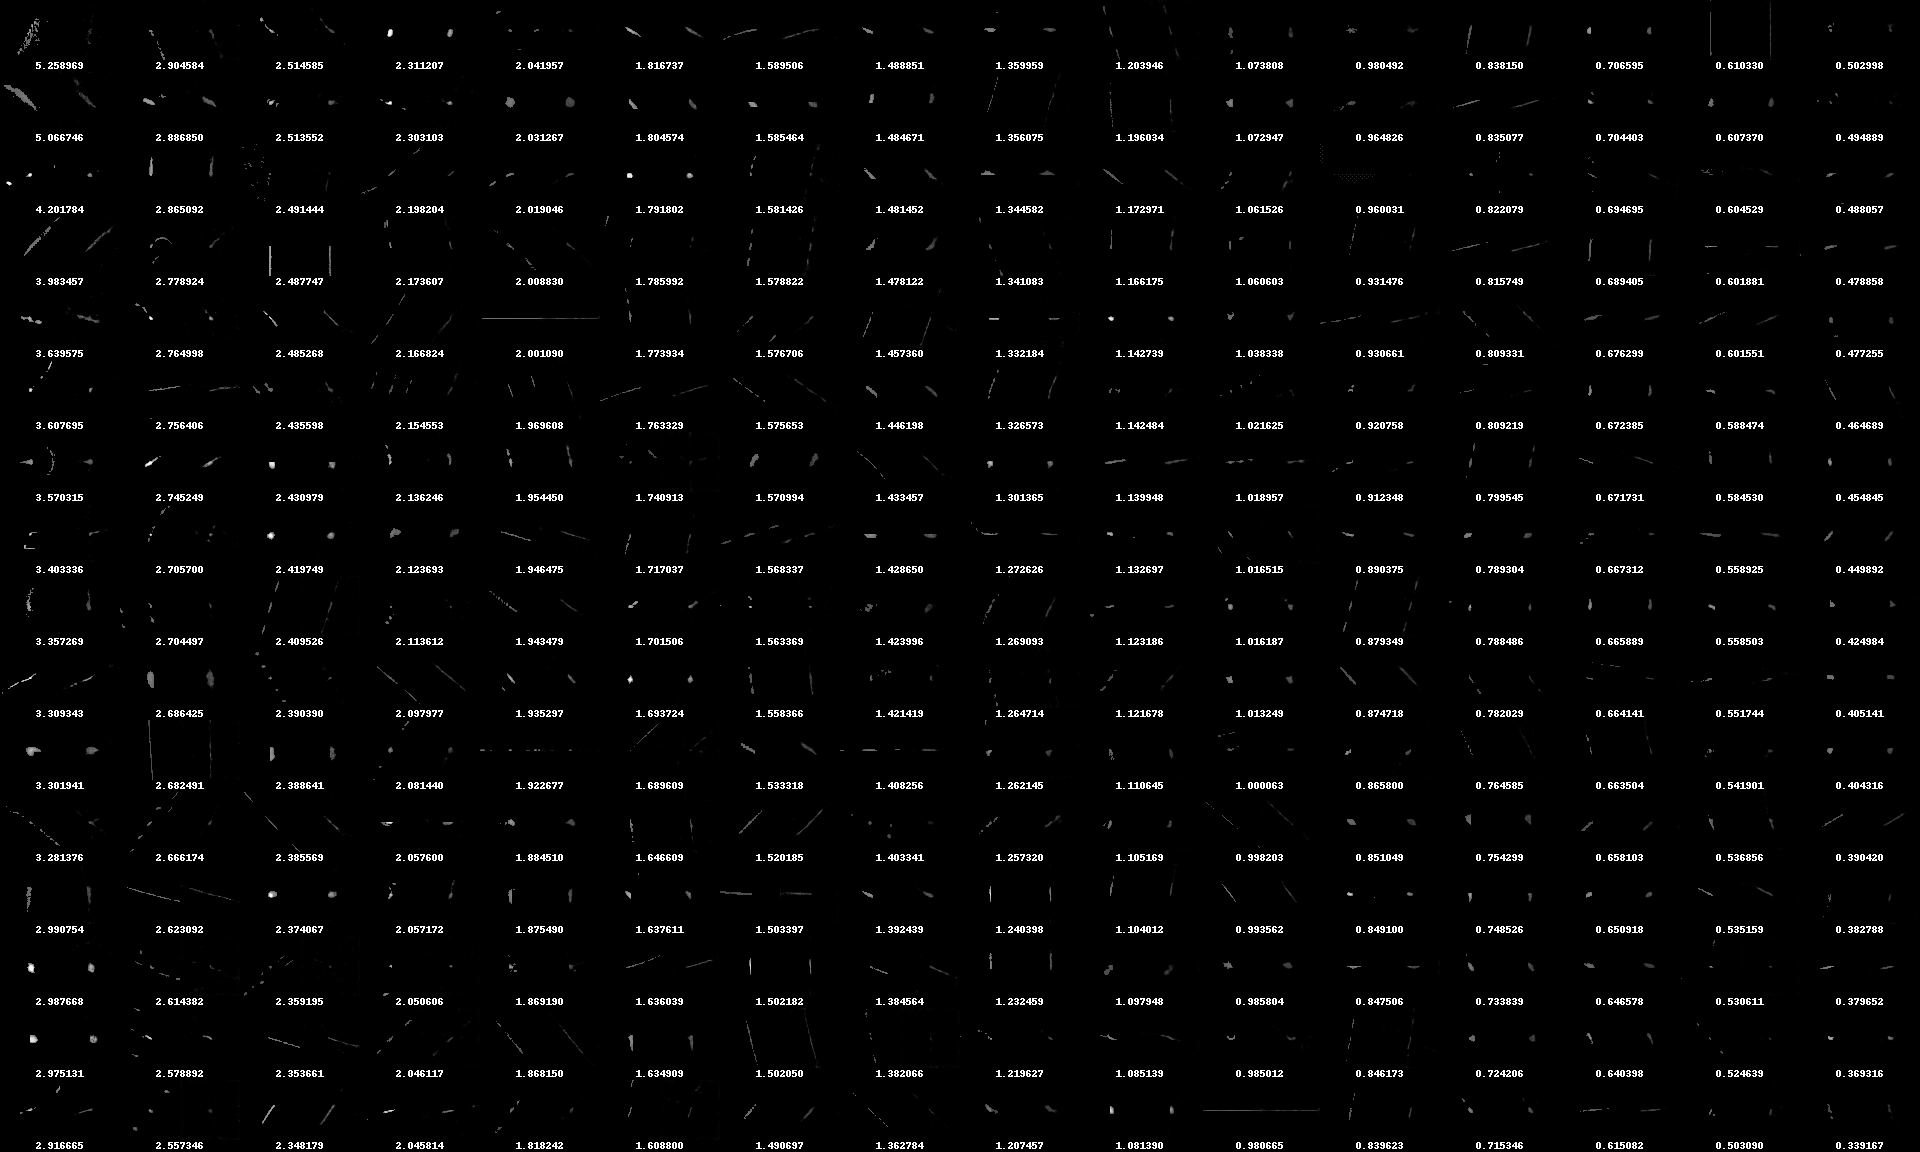

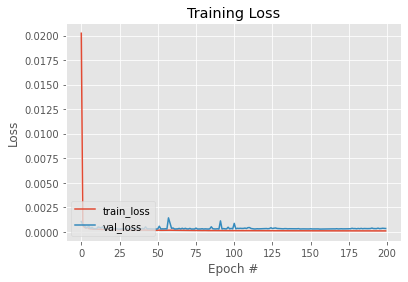

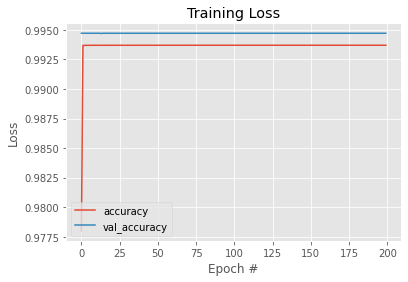

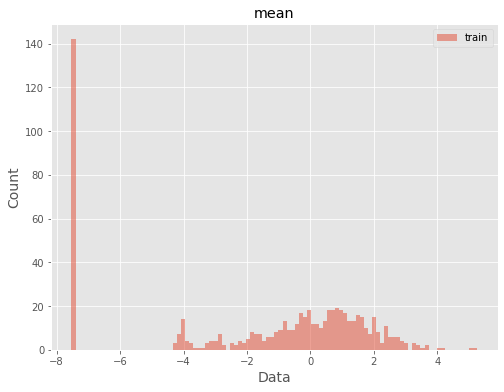

In [6]:
load_and_train(ARTIFACTS_DST, ARTIFACTS_AC)